<a href="https://colab.research.google.com/github/daniel-usp/risco/blob/main/Carteira_EWMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
!pip install yfinance

In [76]:
##Importando bibliotecas
import yfinance as yf
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib
from datetime import date
matplotlib.rcParams['figure.figsize'] = (18,8)

In [77]:
#Fazendo o upload do arquivo trades.xlsx
arquivo = pd.read_excel('/content/Carteira.xlsx', sheet_name='VISTA')
arquivo.columns = arquivo.iloc[0]
arquivo = arquivo.iloc[2:] 
arquivo.index = arquivo["Data"]
cols = [idx for idx,tipo in enumerate(arquivo.columns.values) if type(tipo) is str]
arquivo = arquivo.iloc[:,cols]
arquivo.columns = ["Data", "ticker", "C/V", "Quantidade", "Unitário (s corretagem)", 
                    "Total (s corretagem)", "Unitário (c corretagem)", "Total (c corretagem)", "Total Despesas"]
arquivo.drop(columns=["Data", "Unitário (s corretagem)", "Total (s corretagem)", "Total Despesas"], inplace=True)
arquivo



,ticker,C/V,Quantidade,Unitário (c corretagem),Total (c corretagem)
Data,,,,,
2020-02-12,BRFS3,C,650000,16.59,-10774892.710105
2020-02-13,PETR4,C,70000,15.9,-1112053.362105
2020-03-05,BRFS3,C,55000,19.43,-1067435.172154
2020-03-18,PETR4,C,80000,16.63,-1329341.946352
2020-04-08,PETR4,C,110000,16.95,-1863059.532429
...,...,...,...,...,...
2021-03-03,PETR4,C,100000,21.18,-2115862.595225
2021-03-05,BRFS3,C,100000,23.81,-2378969.858839
2021-03-05,BRFS3,V,80500,24.21,1952115.838919


In [78]:
### Criando tabela com colunas para cada ativo e indexando por data
trade_quantidade = pd.pivot_table(arquivo, values='Quantidade', index='Data', columns='ticker', aggfunc=np.sum, fill_value=0)
trade_quantidade

ticker,BBDC4,BRFS3,CSNA3,ITUB4,JBSS3,MGLU3,MRFG3,PETR3,PETR4,USIM5,VALE3,VIIA3
Data,,,,,,,,,,,,
2020-02-12,0,650000,0,0,0,0,0,0,0,0,0,0
2020-02-13,0,0,0,0,0,0,0,0,70000,0,0,0
2020-03-05,0,55000,0,0,0,0,0,0,0,0,0,0
2020-03-18,0,0,0,0,0,0,0,0,80000,0,0,0
2020-04-08,0,0,0,0,0,0,0,0,110000,0,0,0
2020-05-11,0,0,0,0,0,0,0,0,560000,0,0,0
2020-05-12,0,0,0,0,0,0,0,0,300000,0,0,0
2020-05-13,0,0,0,0,0,0,0,0,710000,0,0,0
2020-06-04,0,0,0,0,0,0,0,0,150000,0,0,0


In [79]:
### Criando tabela com os preços de compra e venda
trade_preco = pd.pivot_table(arquivo, values="Unitário (c corretagem)", index=['Data'], columns=arquivo['ticker'].str.upper(), aggfunc=np.sum,fill_value=0)
trade_preco

ticker,BBDC4,BRFS3,CSNA3,ITUB4,JBSS3,MGLU3,MRFG3,PETR3,PETR4,USIM5,VALE3,VIIA3
Data,,,,,,,,,,,,
2020-02-12,0.00,16.59,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2020-02-13,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,15.90,0.00,0.00,0.00
2020-03-05,0.00,19.43,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2020-03-18,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,16.63,0.00,0.00,0.00
2020-04-08,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,16.95,0.00,0.00,0.00
2020-05-11,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,36.10,0.00,0.00,0.00
2020-05-12,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,18.47,0.00,0.00,0.00
2020-05-13,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,18.35,0.00,0.00,0.00
2020-06-04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,21.30,0.00,0.00,0.00


In [80]:
### Baixando os cotações das ações
prices = yf.download(tickers=(trade_quantidade.columns+'.SA').to_list(), start=trade_quantidade.index[0], rounding=True)['Adj Close']

[*********************100%***********************]  12 of 12 completed


In [ ]:
prices

,BBDC4.SA,BRFS3.SA,CSNA3.SA,ITUB4.SA,JBSS3.SA,MGLU3.SA,MRFG3.SA,PETR3.SA,PETR4.SA,USIM5.SA,VALE3.SA,VIIA3.SA
Date,,,,,,,,,,,,
2020-02-12,23.63,31.25,11.94,32.75,21.80,13.6417,8.48,23.56,22.38,8.56,41.70,14.99
2020-02-13,23.17,31.33,11.95,32.24,22.21,13.9124,8.89,23.11,22.08,8.98,40.97,15.01
2020-02-14,22.65,30.90,11.65,31.70,21.78,13.7368,9.16,22.88,21.86,8.59,40.07,14.73
2020-02-17,22.46,31.00,12.04,31.41,21.80,14.3513,9.86,22.94,21.81,8.45,41.97,15.10
2020-02-18,22.37,30.85,12.25,31.54,21.71,14.1977,10.59,23.11,22.10,8.48,41.49,14.97
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-11,18.87,12.39,18.25,24.11,34.78,3.9300,14.92,36.44,33.57,10.36,78.69,2.59
2022-05-12,18.99,12.58,17.24,24.49,35.55,4.1800,15.05,36.58,33.83,10.18,77.90,2.71
2022-05-13,19.21,13.88,17.92,24.78,35.95,4.3800,15.61,36.63,34.27,10.53,77.81,2.78


In [81]:
### Consolida posições
prices.columns  = prices.columns.str.rstrip('.SA')
prices.dropna(how='all', inplace=True)
trades = trade_quantidade.reindex(index=prices.index)
trades.fillna(value=0, inplace=True)
aportes = (trades * trade_preco).sum(axis=1)
trades.cumsum()
trades

ticker,BBDC4,BRFS3,CSNA3,ITUB4,JBSS3,MGLU3,MRFG3,PETR3,PETR4,USIM5,VALE3,VIIA3
Date,,,,,,,,,,,,
2020-02-12,0.0,650000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70000.0,0.0,0.0,0.0
2020-02-14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-05-12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-05-13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [82]:
### Consolida posições
prices.columns  = prices.columns.str.rstrip('.SA')
prices.dropna(how='all', inplace=True)
trades = trade_quantidade.reindex(index=prices.index)
trades.fillna(value=0, inplace=True)
aportes = (trades * trade_preco).sum(axis=1)
posicao = trades.cumsum()

In [83]:
### Consolida saldo
carteira = posicao * prices
carteira['saldo'] = carteira.sum(axis=1)
#carteira = carteira[:-2]

### Exporta para Excel
data_atual = date.today()
carteira.to_excel('carteira_{}-{}-{}.xlsx'.format(data_atual.day, data_atual.month,data_atual.year))
carteira

ticker,BBDC4,BRFS3,CSNA3,ITUB4,JBSS3,MGLU3,MRFG3,PETR3,PETR4,USIM5,VALE3,VIIA3,saldo
Date,,,,,,,,,,,,,
2020-02-12,0.0,20312500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20312500.0
2020-02-13,0.0,20364500.0,0.0,0.0,0.0,0.0,0.0,0.0,1545600.0,0.0,0.0,0.0,21910100.0
2020-02-14,0.0,20085000.0,0.0,0.0,0.0,0.0,0.0,0.0,1530200.0,0.0,0.0,0.0,21615200.0
2020-02-17,0.0,20150000.0,0.0,0.0,0.0,0.0,0.0,0.0,1526700.0,0.0,0.0,0.0,21676700.0
2020-02-18,0.0,20052500.0,0.0,0.0,0.0,0.0,0.0,0.0,1547000.0,0.0,0.0,0.0,21599500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-11,16983000.0,24978240.0,3650000.0,26521000.0,13912000.0,393000.0,6564800.0,18220000.0,194121882.0,3108000.0,67279950.0,828800.0,376560672.0
2022-05-12,17091000.0,25361280.0,3448000.0,26939000.0,14220000.0,418000.0,6622000.0,18290000.0,195625358.0,3054000.0,66604500.0,867200.0,378540338.0
2022-05-13,17289000.0,27982080.0,3584000.0,27258000.0,14380000.0,438000.0,6868400.0,18315000.0,198169702.0,3159000.0,66527550.0,889600.0,384860332.0


# Volatilidade 

[*********************100%***********************]  12 of 12 completed
[*********************100%***********************]  1 of 1 completed


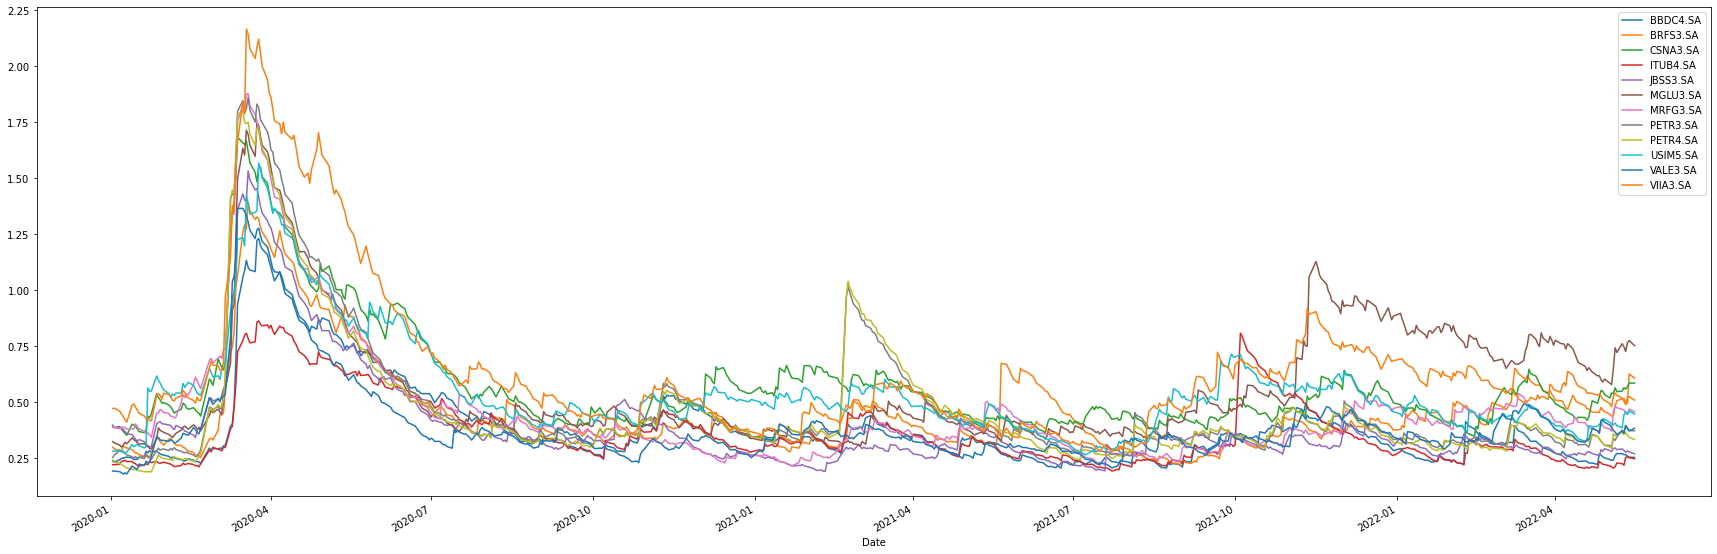

In [94]:
#Baixa os dados históricos
hist_price = yf.download(tickers=(trade_quantidade.columns+'.SA').to_list(), period="5y")['Adj Close']
retr_log = np.log(hist_price).diff()
retr_log.dropna(inplace=True)

#Calcula o peso de cada ação  - dados históricos de movimentações
weights = carteira.div(carteira['saldo'], axis=0)
weights = weights.iloc[:,:-1]
weights.columns = retr_log.columns

#Calcula a volatilidade EWMA para todos os ativos em uma janela de 252 dias
vol = retr_log.ewm(alpha = 0.06, min_periods=1, adjust=False).std(252)
vol = vol*252**(1/2)
vol['2020':].plot(figsize = (30,10))


#Baixa os dados e calcula volatilidade para o IBOVESPA
prices = yf.download(tickers= "^BVSP", period="5y", rounding=True)['Adj Close']
retr_log_ibov = np.log(prices).diff()
retr_log_ibov.dropna(inplace=True)




#Volatilidade da Carteira

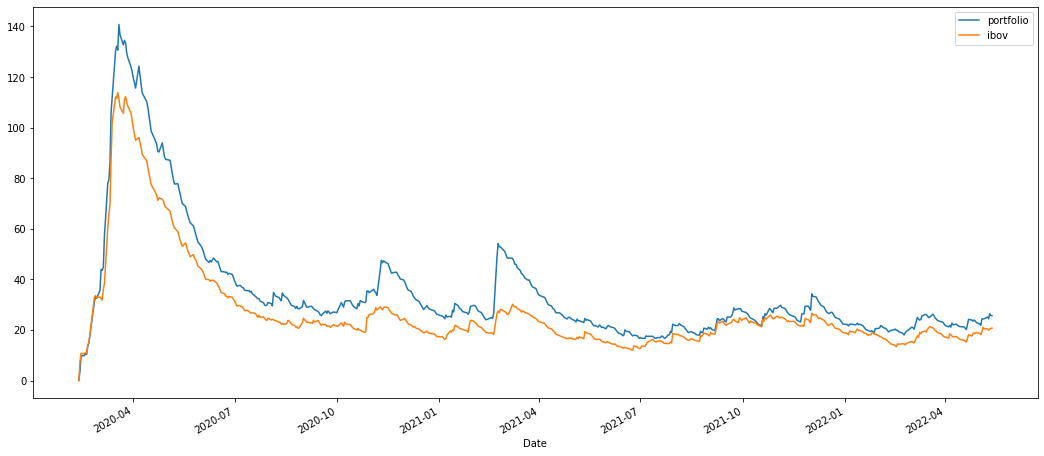

In [92]:

ret_carteira = retr_log.loc[list(set(retr_log.index[0:-1]).intersection(set(weights.index[0:-1])))].sort_index()
peso_carteira = weights.loc[list(set(retr_log.index[0:-1]).intersection(set(weights.index[0:-1])))].sort_index()
ret_carteira['portfolio'] = (peso_carteira*ret_carteira).sum(axis =1)
ret_carteira['ibov'] = retr_log_ibov.loc[list(set(retr_log.index[0:-1]).intersection(set(weights.index[0:-1])))].sort_index()

#Calcula a volatilidade EWMA para todos os ativos em uma janela de 252 dias
r = ret_carteira[['portfolio','ibov']].ewm(alpha = 0.06, min_periods=1, adjust=False).std(252)
vol  = ((r)*252**(1/2))*100
vol.plot()






NameError: ignored

In [ ]:
0.01*252**(1/2)

0.15874507866387544